<a href="https://colab.research.google.com/github/nushanVitharana/Stock_Price_Predition/blob/main/Stock_Price_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Loading Our Dataset**

In [3]:
from google.colab import files

In [4]:
dataset = files.upload()


Saving TSLA.csv to TSLA.csv


In [ ]:
df = pd.read_csv('TSLA.csv')

## **Feature Extraction**

 The number of the trading days and the columns: 

In [ ]:
df.shape

(2392, 7)

In [ ]:
df = df['Open'].values
df = df.reshape(-1, 1)

After extracting one column:


In [ ]:
df.shape

(2392, 1)

In [ ]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])
print(dataset_train.shape)
print(dataset_test.shape)

(1913, 1)
(479, 1)


Importing our model:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

Scaling data:

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.0239104 ],
       [0.01851302],
       [0.01041695],
       [0.00070166],
       [0.        ]])

In [ ]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.8340845 ],
       [0.87127243],
       [0.88293085],
       [0.81983541],
       [0.80958041]])

In [ ]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 

Creating training and testing datasets:

In [ ]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

Creating our LSTM model:

In [ ]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

Reshape features for the LSTM layer:

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

Start the training:

In [ ]:
model.fit(x_train, y_train, epochs=100, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/100
59/59 [==============================] - 11s 130ms/step - loss: 9.9052e-04
Epoch 2/100
59/59 [==============================] - 8s 130ms/step - loss: 9.1814e-04
Epoch 3/100
59/59 [==============================] - 8s 130ms/step - loss: 0.0013
Epoch 4/100
59/59 [==============================] - 8s 128ms/step - loss: 0.0010
Epoch 5/100
59/59 [==============================] - 8s 129ms/step - loss: 0.0011
Epoch 6/100
59/59 [==============================] - 8s 130ms/step - loss: 0.0010
Epoch 7/100
59/59 [==============================] - 8s 129ms/step - loss: 9.0832e-04
Epoch 8/100
59/59 [==============================] - 8s 130ms/step - loss: 9.7051e-04
Epoch 9/100
59/59 [==============================] - 8s 129ms/step - loss: 8.8690e-04
Epoch 10/100
59/59 [==============================] - 8s 129ms/step - loss: 9.9266e-04
Epoch 11/100
59/59 [==============================] - 8s 129ms/step - loss: 9.3815e-04
Epoch 12/100
59/59 [==============================] - 8s 127ms/step

In [ ]:
model = load_model('stock_prediction.h5')

## **Results visualization**

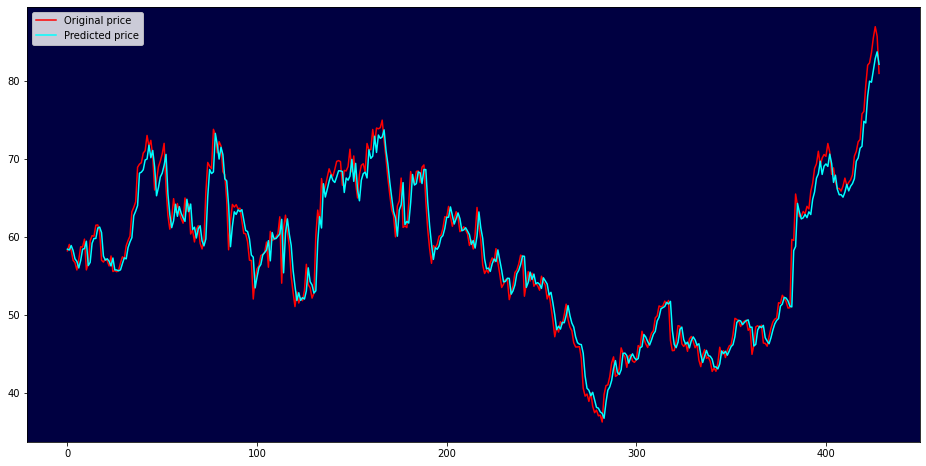

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

MONTE CARLO SIMULATION FOR STOCK PRICE PREDICTION 

In [5]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


In [58]:
df = pd.read_csv('TSLA.csv', usecols=[0,5])
'''
data = data['Open'].values
data = data.reshape(-1, 1)
data = data.flatten()
#Plot
data.plot(figsize=(15,6))
'''
df['Date'] = pd.to_datetime(df['Date'])
df
#plt.plot(df)

,Date,Adj Close
0,2010-07-01,4.392000
1,2010-07-02,3.840000
2,2010-07-06,3.222000
3,2010-07-07,3.160000
4,2010-07-08,3.492000
...,...,...
2387,2019-12-24,85.050003
2388,2019-12-26,86.188004
2389,2019-12-27,86.075996
2390,2019-12-30,82.940002


In [59]:
s_date = "1/7/2010"
e_date = "31/7/2010"

s_date2 = "1/8/2010"
e_date2 = "30/8/2012"

filt1 = (df['Date'] > pd.to_datetime(s_date)) & (df['Date'] < pd.to_datetime(e_date))
# update the dataframe according to filtered dates............................
df_train = df.loc[filt1] 


filt2 = (df['Date'] > pd.to_datetime(s_date2)) & (df['Date'] < pd.to_datetime(e_date2))
# update the dataframe according to filtered dates............................
df_test = df.loc[filt2] 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

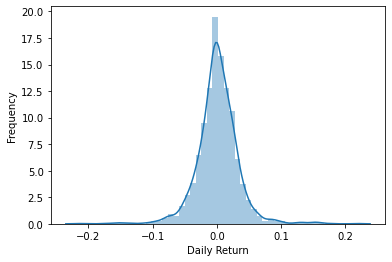

In [35]:
df_train = df.set_index("Date")
log_return = np.log(1 + df_train.pct_change())
#Plot
sns.distplot(log_return.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [40]:
u = log_return.mean()
var = log_return.var()
drift = u - (0.5*var)

print(u)
print(var)
print(drift)

Adj Close    0.001233
dtype: float64
Adj Close    0.001038
dtype: float64
Adj Close    0.000714
dtype: float64


In [49]:
stdev = log_return.std()
days = 50
trials = 100
Z = norm.ppf(np.random.rand(days, trials)) #days, trials
daily_returns = np.exp(drift.values + stdev.values * Z)

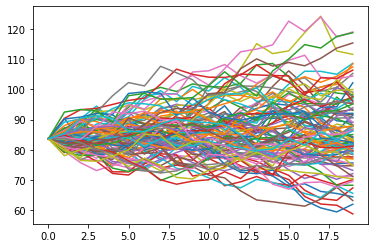

In [56]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = df_train.iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]

#print(price_paths)
plt.plot(price_paths)

In [ ]:
def import_stock_data(tickers, start = '2010-1-1'):
    data = pd.DataFrame()
    if len([tickers]) ==1:
        data[tickers] = wb.DataReader(tickers, data_source='yahoo', start = start)['Adj Close']
        data = pd.DataFrame(data)
    else:
        for t in tickers:
            data[t] = wb.DataReader(t, data_source='yahoo', start = start)['Adj Close']
    return(data)
#Example use
data = import_stock_data(["FB","GOOG","AAPL"], start = '2005-1-1')

In [ ]:
def import_stock_data(tickers, start = '2010-1-1'):
    data = pd.DataFrame()
    if len([tickers]) ==1:
        data[tickers] = wb.DataReader(tickers, data_source='yahoo', start = start)['Adj Close']
        data = pd.DataFrame(data)
    else:
        for t in tickers:
            data[t] = wb.DataReader(t, data_source='yahoo', start = start)['Adj Close']
    return(data)
#Example use
data = import_stock_data(["FB","GOOG","AAPL"], start = '2005-1-1')